<a href="https://colab.research.google.com/github/Lee-Gunju/Lee-Gunju/blob/master/BIGDATA_lecture_Midterm_Project_Submission_leegeonju_2020120215.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd

reviews = pd.read_csv("/content/dedupe_challenge.csv")

In [19]:
reviews.shape

(129980, 13)

In [20]:
reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [21]:
reviews.loc[:, ['taster_name', 'taster_twitter_handle', 'points']]


,taster_name,taster_twitter_handle,points
0,Kerin O’Keefe,@kerinokeefe,87
1,Roger Voss,@vossroger,87
2,Paul Gregutt,@paulgwine,87
3,Alexander Peartree,NaN,87
4,Paul Gregutt,@paulgwine,87
...,...,...,...
129975,Anna Lee C. Iijima,NaN,90
129976,Paul Gregutt,@paulgwine,90
129977,Roger Voss,@vossroger,90
129978,Roger Voss,@vossroger,90


In [22]:
reviews.set_index("title")

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,variety,winery
title,,,,,,,,,,,,
Nicosia 2013 Vulkà Bianco (Etna),Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,White Blend,Nicosia
Quinta dos Avidagos 2011 Avidagos Red (Douro),Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Portuguese Red,Quinta dos Avidagos
Rainstorm 2013 Pinot Gris (Willamette Valley),US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Pinot Gris,Rainstorm
St. Julian 2013 Reserve Late Harvest Riesling (Lake Michigan Shore),US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,Riesling,St. Julian
Sweet Cheeks 2012 Vintner's Reserve Wild Child Block Pinot Noir (Willamette Valley),US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...
Dr. H. Thanisch (Erben Müller-Burggraef) 2013 Brauneberger Juffer-Sonnenuhr Spätlese Riesling (Mosel),Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
Citation 2004 Pinot Noir (Oregon),US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Pinot Noir,Citation
Domaine Gresser 2013 Kritt Gewurztraminer (Alsace),France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Gewürztraminer,Domaine Gresser


In [23]:
reviews.points.describe()

count    129980.000000
mean         88.446946
std           3.039721
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

In [24]:
reviews.describe()

,points,price
count,129980.000000,120984.000000
mean,88.446946,35.361783
std,3.039721,41.021130
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [26]:
reviews.groupby('points').points.count()


points
80       397
81       692
82      1836
83      3025
84      6480
85      9535
86     12602
87     16935
88     17207
89     12226
90     15410
91     11359
92      9613
93      6489
94      3758
95      1535
96       523
97       229
98        77
99        33
100       19
Name: points, dtype: int64

In [27]:
reviews.groupby('points').price.min()

points
80      5.0
81      5.0
82      4.0
83      4.0
84      4.0
85      4.0
86      4.0
87      5.0
88      6.0
89      7.0
90      8.0
91      7.0
92     11.0
93     12.0
94     13.0
95     20.0
96     20.0
97     35.0
98     50.0
99     44.0
100    80.0
Name: price, dtype: float64

In [28]:
reviews.groupby('winery').apply(lambda df: df.title.iloc[0])


winery
1+1=3                                     1+1=3 NV Rosé Sparkling (Cava)
10 Knots                            10 Knots 2010 Viognier (Paso Robles)
100 Percent Wine              100 Percent Wine 2015 Moscato (California)
1000 Stories           1000 Stories 2013 Bourbon Barrel Aged Zinfande...
1070 Green                  1070 Green 2011 Sauvignon Blanc (Rutherford)
                                             ...                        
Órale                       Órale 2011 Cabronita Red (Santa Ynez Valley)
Öko                    Öko 2013 Made With Organically Grown Grapes Ma...
Ökonomierat Rebholz    Ökonomierat Rebholz 2007 Von Rotliegenden Spät...
àMaurice               àMaurice 2013 Fred Estate Syrah (Walla Walla V...
Štoka                                    Štoka 2009 Izbrani Teran (Kras)
Length: 16757, dtype: object

In [34]:
country_groupby = reviews.groupby(['country', 'province']).apply(lambda df: df.loc[df.points.idxmax()])
country_groupby

country  ...                winery
country   province                     ...                      
Argentina Mendoza Province  Argentina  ...  Bodega Catena Zapata
          Other             Argentina  ...                Colomé
Armenia   Armenia             Armenia  ...              Van Ardi
Australia Australia Other   Australia  ...       Marquis Philips
          New South Wales   Australia  ...            De Bortoli
...                               ...  ...                   ...
Uruguay   Juanico             Uruguay  ...        Familia Deicas
          Montevideo          Uruguay  ...                 Bouza
          Progreso            Uruguay  ...                Pisano
          San Jose            Uruguay  ...        Castillo Viejo
          Uruguay             Uruguay  ...               Narbona

[425 rows x 13 columns]

In [33]:
country_groupby

country  ...                winery
country   province                     ...                      
Argentina Mendoza Province  Argentina  ...  Bodega Catena Zapata
          Other             Argentina  ...                Colomé
Armenia   Armenia             Armenia  ...              Van Ardi
Australia Australia Other   Australia  ...       Marquis Philips
          New South Wales   Australia  ...            De Bortoli
...                               ...  ...                   ...
Uruguay   Juanico             Uruguay  ...        Familia Deicas
          Montevideo          Uruguay  ...                 Bouza
          Progreso            Uruguay  ...                Pisano
          San Jose            Uruguay  ...        Castillo Viejo
          Uruguay             Uruguay  ...               Narbona

[425 rows x 13 columns]

In [37]:
price_agg = reviews.groupby(['country']).price.agg([len, min, max])
price_agg

,len,min,max
country,,,
Argentina,3800.0,4.0,230.0
Armenia,2.0,14.0,15.0
Australia,2329.0,5.0,850.0
Austria,3345.0,7.0,1100.0
Bosnia and Herzegovina,2.0,12.0,13.0
Brazil,52.0,10.0,60.0
Bulgaria,141.0,8.0,100.0
Canada,257.0,12.0,120.0
Chile,4476.0,5.0,400.0


In [38]:
countries_reviewed = reviews.groupby(['country', 'province']).description.agg([len])
countries_reviewed

len
country   province              
Argentina Mendoza Province  3264
          Other              536
Armenia   Armenia              2
Australia Australia Other    245
          New South Wales     85
...                          ...
Uruguay   Juanico             12
          Montevideo          11
          Progreso            11
          San Jose             3
          Uruguay             24

[425 rows x 1 columns]

In [39]:
mi = countries_reviewed.index
type(mi)

pandas.core.indexes.multi.MultiIndex

In [40]:
countries_reviewed.reset_index()

,country,province,len
0,Argentina,Mendoza Province,3264
1,Argentina,Other,536
2,Armenia,Armenia,2
3,Australia,Australia Other,245
4,Australia,New South Wales,85
...,...,...,...
420,Uruguay,Juanico,12
421,Uruguay,Montevideo,11
422,Uruguay,Progreso,11
423,Uruguay,San Jose,3


In [41]:
countries_reviewed = countries_reviewed.reset_index()
countries_reviewed.sort_values(by='len')

,country,province,len
179,Greece,Muscat of Kefallonian,1
192,Greece,Sterea Ellada,1
194,Greece,Thraki,1
354,South Africa,Paardeberg,1
40,Brazil,Serra do Sudeste,1
...,...,...,...
409,US,Oregon,5373
227,Italy,Tuscany,5897
118,France,Bordeaux,5941
415,US,Washington,8639


In [42]:
countries_reviewed.sort_values(by='len', ascending=False)

,country,province,len
392,US,California,36250
415,US,Washington,8639
118,France,Bordeaux,5941
227,Italy,Tuscany,5897
409,US,Oregon,5373
...,...,...,...
101,Croatia,Krk,1
247,New Zealand,Gladstone,1
357,South Africa,Piekenierskloof,1
63,Chile,Coelemu,1


In [43]:
countries_reviewed.sort_index()

,country,province,len
0,Argentina,Mendoza Province,3264
1,Argentina,Other,536
2,Armenia,Armenia,2
3,Australia,Australia Other,245
4,Australia,New South Wales,85
...,...,...,...
420,Uruguay,Juanico,12
421,Uruguay,Montevideo,11
422,Uruguay,Progreso,11
423,Uruguay,San Jose,3


In [44]:
countries_reviewed.sort_values(by=['country', 'len'])

,country,province,len
1,Argentina,Other,536
0,Argentina,Mendoza Province,3264
2,Armenia,Armenia,2
6,Australia,Tasmania,42
4,Australia,New South Wales,85
...,...,...,...
421,Uruguay,Montevideo,11
422,Uruguay,Progreso,11
420,Uruguay,Juanico,12
424,Uruguay,Uruguay,24


In [45]:
reviews.head(3)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


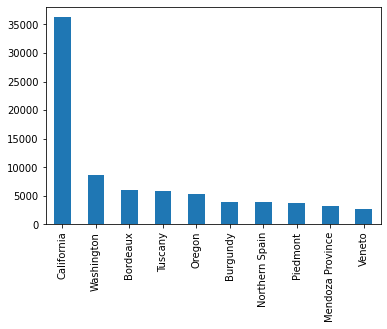

In [46]:
reviews['province'].value_counts().head(10).plot.bar()


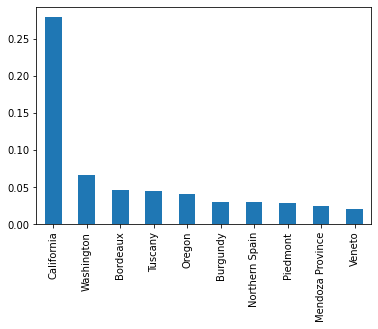

In [47]:
(reviews['province'].value_counts().head(10) / len(reviews)).plot.bar()


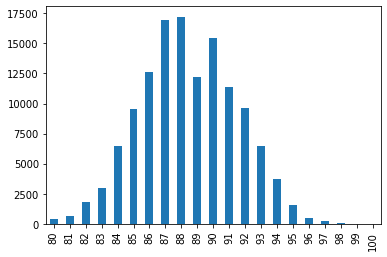

In [48]:
reviews['points'].value_counts().sort_index().plot.bar()


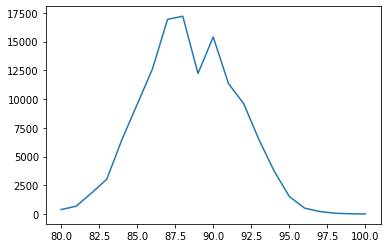

In [49]:
reviews['points'].value_counts().sort_index().plot.line()


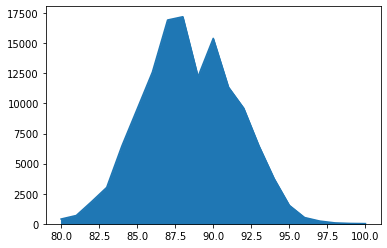

In [50]:
reviews['points'].value_counts().sort_index().plot.area()


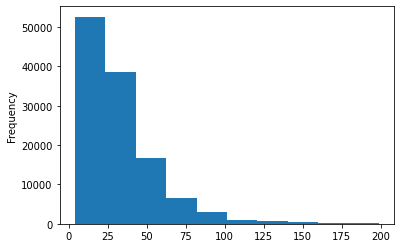

In [51]:
reviews[reviews['price'] < 200]['price'].plot.hist()


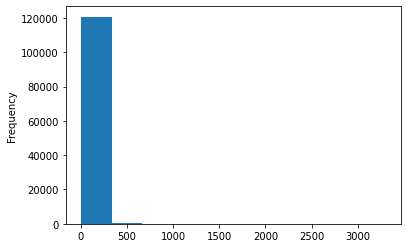

In [52]:
reviews['price'].plot.hist()


In [53]:
reviews[reviews['price'] > 1500]


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1559,France,"A massive wine for Margaux, packed with tannin...",NaN,98,1900.0,Bordeaux,Margaux,NaN,Roger Voss,@vossroger,Château Margaux 2009 Margaux,Bordeaux-style Red Blend,Château Margaux
15841,France,The wine is a velvet glove in an iron fist. Th...,NaN,96,2500.0,Bordeaux,Pomerol,NaN,Roger Voss,@vossroger,Château Pétrus 2014 Pomerol,Bordeaux-style Red Blend,Château Pétrus
65355,France,This extravagantly perfumed wine has great jui...,NaN,97,2000.0,Bordeaux,Pomerol,NaN,Roger Voss,@vossroger,Château Pétrus 2011 Pomerol,Bordeaux-style Red Blend,Château Pétrus
80293,France,This ripe wine shows plenty of blackberry frui...,NaN,88,3300.0,Bordeaux,Médoc,NaN,Roger Voss,@vossroger,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet
98384,France,"A superb wine from a great year, this is power...",NaN,96,2500.0,Burgundy,La Romanée,NaN,Roger Voss,@vossroger,Domaine du Comte Liger-Belair 2010 La Romanée,Pinot Noir,Domaine du Comte Liger-Belair
113568,France,"A wonderfully complete wine, with all the elem...",NaN,96,2000.0,Burgundy,La Romanée,NaN,Roger Voss,@vossroger,Domaine du Comte Liger-Belair 2005 La Romanée,Pinot Noir,Domaine du Comte Liger-Belair
120397,US,The nose on this single-vineyard wine from a s...,Roger Rose Vineyard,91,2013.0,California,Arroyo Seco,Central Coast,Matt Kettmann,@mattkettmann,Blair 2013 Roger Rose Vineyard Chardonnay (Arr...,Chardonnay,Blair


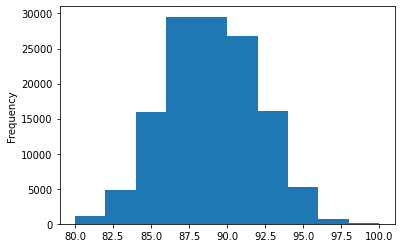

In [54]:
reviews['points'].plot.hist()


In [62]:
reviews.price.dtype


dtype('float64')

In [63]:
reviews.dtypes

country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

In [64]:
reviews.points.astype('float64')

0         87.0
1         87.0
2         87.0
3         87.0
4         87.0
          ... 
129975    90.0
129976    90.0
129977    90.0
129978    90.0
129979    90.0
Name: points, Length: 129980, dtype: float64

In [65]:
reviews.index.dtype

dtype('int64')

In [74]:
reviews[pd.isna(reviews)]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
reviews[pd.isnull(reviews.country)]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
914,NaN,"Amber in color, this wine has aromas of peach ...",Asureti Valley,87,30.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Gotsa Family Wines 2014 Asureti Valley Chinuri,Chinuri,Gotsa Family Wines
3132,NaN,"Soft, fruity and juicy, this is a pleasant, si...",Partager,83,NaN,NaN,NaN,NaN,Roger Voss,@vossroger,Barton & Guestier NV Partager Red,Red Blend,Barton & Guestier
4244,NaN,"Violet-red in color, this semisweet wine has a...",Red Naturally Semi-Sweet,88,18.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Kakhetia Traditional Winemaking 2012 Red Natur...,Ojaleshi,Kakhetia Traditional Winemaking
9510,NaN,This mouthwatering blend starts with a nose of...,Theopetra Malagouzia-Assyrtiko,92,28.0,NaN,NaN,NaN,Susan Kostrzewa,@suskostrzewa,Tsililis 2015 Theopetra Malagouzia-Assyrtiko W...,White Blend,Tsililis
9751,NaN,This orange-style wine has a cloudy yellow-gol...,Orange Nikolaevo Vineyard,89,28.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Ross-idi 2015 Orange Nikolaevo Vineyard Chardo...,Chardonnay,Ross-idi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124182,NaN,This Swiss red blend is composed of four varie...,Les Romaines,90,30.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Les Frères Dutruy 2014 Les Romaines Red,Red Blend,Les Frères Dutruy
129416,NaN,Dry spicy aromas of dusty plum and tomato add ...,Reserve,89,22.0,NaN,NaN,NaN,Michael Schachner,@wineschach,El Capricho 2015 Reserve Cabernet Sauvignon,Cabernet Sauvignon,El Capricho
129417,NaN,El Capricho is one of Uruguay's more consisten...,Reserve,89,22.0,NaN,NaN,NaN,Michael Schachner,@wineschach,El Capricho 2015 Reserve Tempranillo,Tempranillo,El Capricho
129599,NaN,"A blend of 60% Syrah, 30% Cabernet Sauvignon a...",Shah,90,30.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Büyülübağ 2012 Shah Red,Red Blend,Büyülübağ


In [67]:
reviews.region_2.fillna("Unknown")

0                   Unknown
1                   Unknown
2         Willamette Valley
3                   Unknown
4         Willamette Valley
                ...        
129975              Unknown
129976         Oregon Other
129977              Unknown
129978              Unknown
129979              Unknown
Name: region_2, Length: 129980, dtype: object

In [68]:
reviews.taster_twitter_handle.replace("@kerinokeefe", "@kerino")

0             @kerino
1          @vossroger
2         @paulgwine 
3                 NaN
4         @paulgwine 
             ...     
129975            NaN
129976    @paulgwine 
129977     @vossroger
129978     @vossroger
129979     @vossroger
Name: taster_twitter_handle, Length: 129980, dtype: object

In [77]:
drop_na_reviews = reviews.dropna(axis=0)
drop_na_reviews

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
24,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi
26,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa
36,US,As with many of the Erath 2010 vineyard design...,Hyland,86,50.0,Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Erath 2010 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129928,US,"This ripe, rich, almost decadently thick wine ...",Reserve,91,105.0,Washington,Walla Walla Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Nicholas Cole Cellars 2004 Reserve Red (Walla ...,Red Blend,Nicholas Cole Cellars
129935,US,This pure Syrah from Reininger's estate vineya...,Ash Hollow Vineyard,91,41.0,Washington,Walla Walla Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Reininger 2005 Ash Hollow Vineyard Syrah (Wall...,Syrah,Reininger
129954,US,Hailing from one of the more popular vineyards...,Jurassic Park Vineyard Old Vines,90,20.0,California,Santa Ynez Valley,Central Coast,Matt Kettmann,@mattkettmann,Birichino 2013 Jurassic Park Vineyard Old Vine...,Chenin Blanc,Birichino
129958,US,There's no bones about the use of oak in this ...,Barrel Fermented,90,35.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Flora Springs 2013 Barrel Fermented Chardonnay...,Chardonnay,Flora Springs


In [78]:
drop_na_reviews = drop_na_reviews.reset_index()
drop_na_reviews

,index,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
1,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
2,24,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi
3,26,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa
4,36,US,As with many of the Erath 2010 vineyard design...,Hyland,86,50.0,Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Erath 2010 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22382,129928,US,"This ripe, rich, almost decadently thick wine ...",Reserve,91,105.0,Washington,Walla Walla Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Nicholas Cole Cellars 2004 Reserve Red (Walla ...,Red Blend,Nicholas Cole Cellars
22383,129935,US,This pure Syrah from Reininger's estate vineya...,Ash Hollow Vineyard,91,41.0,Washington,Walla Walla Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Reininger 2005 Ash Hollow Vineyard Syrah (Wall...,Syrah,Reininger
22384,129954,US,Hailing from one of the more popular vineyards...,Jurassic Park Vineyard Old Vines,90,20.0,California,Santa Ynez Valley,Central Coast,Matt Kettmann,@mattkettmann,Birichino 2013 Jurassic Park Vineyard Old Vine...,Chenin Blanc,Birichino
22385,129958,US,There's no bones about the use of oak in this ...,Barrel Fermented,90,35.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Flora Springs 2013 Barrel Fermented Chardonnay...,Chardonnay,Flora Springs


In [79]:
drop_na_reviews.shape

(22387, 14)